# Import Modules

In [1]:
import  numpy  as np
import  pandas as pd
import  math
import  scipy.stats as stats
from    scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from    scipy.stats import chi2_contingency
import  statsmodels.stats.api  as sm
import  matplotlib.pyplot as     plt
import  seaborn           as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_context('poster')  #Everything is larger
import os
os.chdir('C:\\Users\\12965\\Downloads')
print(os.getcwd())

C:\Users\12965\Downloads


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display,clear_output

# Prepare Dataset

In [4]:
df = pd.read_csv('C:/Users/12965/Downloads/MHI PLOTS/Data_For_MHI.csv',parse_dates=['Date'])
df.columns=['date','well','oilrate','waterrate','sand']
dt = df['date'].dt
df.dropna(inplace=True)
df.head()

,date,well,oilrate,waterrate,sand
0,2020-05-07,11M-360,49.974660,2248.859722,FM2/FM3
1,2020-06-07,11M-360,2057.956519,3147.404118,FM2/FM3
2,2020-07-07,11M-360,1407.286440,3704.971405,FM2/FM3
3,2020-08-07,11M-360,852.567708,4157.956721,FM2/FM3
4,2020-09-07,11M-360,800.594061,4144.178707,FM2/FM3


# Calculate MHI and Cum MHI

In [5]:
wells = df['well'].unique()
sands = df['sand'].unique()

In [6]:
ave_grouped_rate = df.groupby(['sand','date']).mean()
max_grouped_rate = df.groupby(['sand','date']).max()
min_grouped_rate = df.groupby(['sand','date']).min()

In [7]:
hi_types = {'hi_oil':'oilrate','hi_water':'waterrate'}

def calc_HI(row):
    if row[hi_types[key]] > 0:
        return (row[hi_types[key]]-ave_grouped_rate.loc[(row['sand'],row['date']),hi_types[key]])/\
             (max_grouped_rate.loc[(row['sand'],row['date']),hi_types[key]]-min_grouped_rate.loc[(row['sand'],row['date']),hi_types[key]])
    else:
        return 0    
    
for key in hi_types.keys():
    df[key] = df.apply(lambda row: calc_HI(row),axis=1)
    df['cum_'+ key] = df.groupby('well').cumsum()[key] 

# Classify Wells to Quadrants

In [8]:
def classify(df):
    w_dict = {}
    
    for w in df['well'].unique():
        last_cum_hi_oil = df[(df['well']==w) & (df['date']==df[df['well']==w]['date'].max())]['cum_hi_oil'].iloc[0]
        last_cum_hi_water = df[(df['well']==w) & (df['date']==df[df['well']==w]['date'].max())]['cum_hi_water'].iloc[0]
        
        if last_cum_hi_oil > 0 and last_cum_hi_water > 0:
            w_dict[w] = 'High Oil and High Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water > 0:
            w_dict[w] = 'Low Oil and High Water'
        elif last_cum_hi_oil > 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'High Oil and Low Water'
        elif last_cum_hi_oil <= 0 and last_cum_hi_water <= 0:
            w_dict[w] = 'Low Oil and Low Water'
    
    return df['well'].map(w_dict)
df['class'] = classify(df)

In [9]:
df.head()

,date,well,oilrate,waterrate,sand,hi_oil,cum_hi_oil,hi_water,cum_hi_water,class
0,2020-05-07,11M-360,49.974660,2248.859722,FM2/FM3,NaN,NaN,NaN,NaN,High Oil and High Water
1,2020-06-07,11M-360,2057.956519,3147.404118,FM2/FM3,NaN,NaN,NaN,NaN,High Oil and High Water
2,2020-07-07,11M-360,1407.286440,3704.971405,FM2/FM3,NaN,NaN,NaN,NaN,High Oil and High Water
3,2020-08-07,11M-360,852.567708,4157.956721,FM2/FM3,NaN,NaN,NaN,NaN,High Oil and High Water
4,2020-09-07,11M-360,800.594061,4144.178707,FM2/FM3,NaN,NaN,NaN,NaN,High Oil and High Water


In [10]:
#RFDP7
M_363=df[df["well"]=="14M-363"][["date","well","class"]]
M_348=df[df["well"]=="04M-348"][["date","well","class"]]
M_398=df[df["well"]=="16M-398"][["date","well","class"]]
M_404=df[df["well"]=="16M-404"][["date","well","class"]]
M_350=df[df["well"]=="04M-350"][["date","well","class"]]
M_412=df[df["well"]=="08M-412"][["date","well","class"]]
M_356=df[df["well"]=="07M-356"][["date","well","class"]]
M_396=df[df["well"]=="02M-396"][["date","well","class"]]
M_417=df[df["well"]=="10M-417"][["date","well","class"]]
M_400=df[df["well"]=="03M-400"][["date","well","class"]]
M_372=df[df["well"]=="14M-372"][["date","well","class"]]
M_391=df[df["well"]=="16M-391"][["date","well","class"]]
M_413=df[df["well"]=="10M-413"][["date","well","class"]]
M_415=df[df["well"]=="10M-415"][["date","well","class"]]
M_419=df[df["well"]=="10M-419"][["date","well","class"]]
M_414=df[df["well"]=="05M-414"][["date","well","class"]]
M_388=df[df["well"]=="02M-388"][["date","well","class"]]
M_352=df[df["well"]=="05M-352"][["date","well","class"]]
M_392=df[df["well"]=="02M-392"][["date","well","class"]]
M_405=df[df["well"]=="17M-405"][["date","well","class"]]
M_408=df[df["well"]=="17M-408"][["date","well","class"]]
M_411=df[df["well"]=="17M-411"][["date","well","class"]]
M_397=df[df["well"]=="16M-397"][["date","well","class"]]
M_363a=df[df["well"]=="14M-363"]
M_348a=df[df["well"]=="04M-348"]
M_398a=df[df["well"]=="16M-398"]
M_404a=df[df["well"]=="16M-404"]
M_350a=df[df["well"]=="04M-350"]
M_412a=df[df["well"]=="08M-412"]
M_356a=df[df["well"]=="07M-356"]
M_396a=df[df["well"]=="02M-396"]
M_417a=df[df["well"]=="10M-417"]
M_400a=df[df["well"]=="03M-400"]
M_372a=df[df["well"]=="14M-372"]
M_391a=df[df["well"]=="16M-391"]
M_413a=df[df["well"]=="10M-413"]
M_415a=df[df["well"]=="10M-415"]
M_419a=df[df["well"]=="10M-419"]
M_414a=df[df["well"]=="05M-414"]
M_388a=df[df["well"]=="02M-388"]
M_352a=df[df["well"]=="05M-352"]
M_392a=df[df["well"]=="02M-392"]
M_405a=df[df["well"]=="17M-405"]
M_408a=df[df["well"]=="17M-408"]
M_411a=df[df["well"]=="17M-411"]
M_397a=df[df["well"]=="16M-397"]

#RFDP6
M_360=df[df["well"]=="11M-360"][["date","well","class"]]
M_416=df[df["well"]=="05M-416"][["date","well","class"]]
M_435=df[df["well"]=="12M-435"][["date","well","class"]]
M_436=df[df["well"]=="12M-436"][["date","well","class"]]
M_437=df[df["well"]=="17M-437"][["date","well","class"]]
M_439=df[df["well"]=="12M-439"][["date","well","class"]]
M_393=df[df["well"]=="16M-393"][["date","well","class"]]
M_438=df[df["well"]=="12M-438z"][["date","well","class"]]
M_360a=df[df["well"]=="11M-360"]
M_416a=df[df["well"]=="05M-416"]
M_435a=df[df["well"]=="12M-435"]
M_436a=df[df["well"]=="12M-436"]
M_437a=df[df["well"]=="17M-437"]
M_439a=df[df["well"]=="12M-439"]
M_393a=df[df["well"]=="16M-393"]
M_438a=df[df["well"]=="12M-438z"]

In [11]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

WELL :  19
16M-393     58
16M-391     58
14M-372     88
03M-400    100
10M-417    110
02M-396    121
12M-439    149
17M-437    156
07M-356    164
08M-412    177
04M-350    187
16M-404    209
12M-435    212
12M-436    212
16M-398    234
04M-348    278
14M-363    280
05M-416    626
11M-360    633
Name: well, dtype: int64


SAND :  6
0             3
FM2/FM3      74
FM5         360
FM3         368
FM2        1242
FM1        2005
Name: sand, dtype: int64


CLASS :  4
High Oil and Low Water      265
Low Oil and High Water      343
Low Oil and Low Water      1330
High Oil and High Water    2114
Name: class, dtype: int64




In [12]:
#plt.figure(figsize=(20,5))
#a=M_416a
#a=a.reset_index().drop("index",axis=1)
#plt.subplot(2,1,1)
#sns.lineplot(x="date",y="cum_hi_oil",data=a,color="green")
#sns.lineplot(x="date",y="cum_hi_water",data=a,color="blue");
#plt.figure(figsize=(20,5))
#plt.subplot(2,1,2)
#sns.lineplot(x="date",y="hi_oil",data=a,color="green")
#sns.lineplot(x="date",y="hi_water",data=a,color="blue")
#plt.figure(figsize=(20,5))
#sns.lineplot(x="date",y="oilrate",data=a,color="green")
#sns.lineplot(x="date",y="waterrate",data=a,color="blue");

<AxesSubplot:xlabel='cum_hi_oil', ylabel='cum_hi_water'>

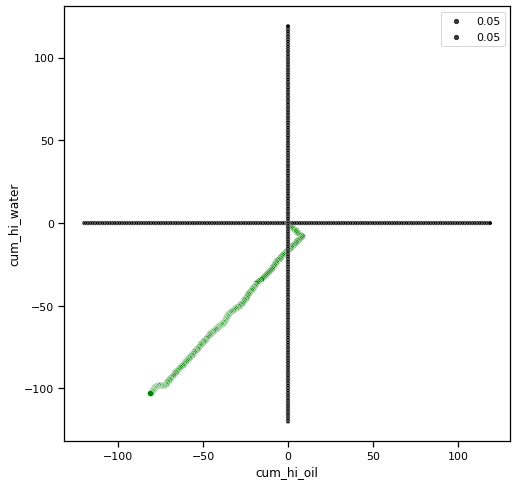

In [13]:
i=120
sns.set_context('notebook')  #Everything is larger
plt.figure(figsize=(8,8))
#sns.scatterplot(x="cum_hi_oil",y="cum_hi_water",data=M_404a,color='red')
sns.scatterplot(x="cum_hi_oil",y="cum_hi_water",data=M_348a,color='green')
sns.scatterplot(x=np.arange(-i,i),y=0,color='black',size=0.05)
sns.scatterplot(y=np.arange(-i,i),x=0,color='black',size=0.05)

This well have total data points equal to  278


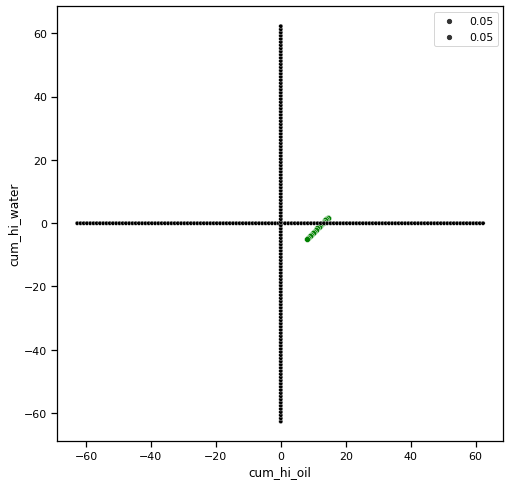

In [43]:
j=M_404a
i=j.shape[0]*0.3
sns.set_context('notebook')  #Everything is larger
plt.figure(figsize=(8,8))
#sns.scatterplot(x="cum_hi_oil",y="cum_hi_water",data=M_404a,color='red')
sns.scatterplot(x="cum_hi_oil",y="cum_hi_water",data=j.iloc[j.shape[0]-20:,:],color='green')
sns.scatterplot(x=np.arange(-i,i),y=0,color='black',size=0.05)
sns.scatterplot(y=np.arange(-i,i),x=0,color='black',size=0.05)
print("This well have total data points equal to ",M_348a.shape[0])

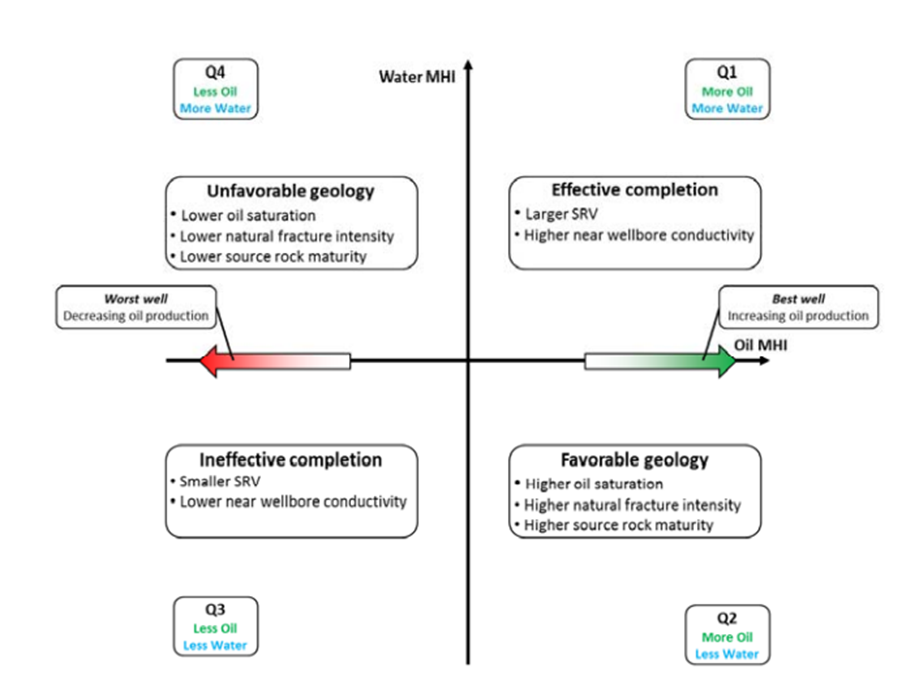